# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reading in and viewing Datasets

In [2]:
training = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
training

training.describe()
training.isna().any()
training[training.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Cleaning / Attribute Preprocessing

In [3]:
#np.median(training["Age"])
na_median = training["Age"].median()
na_mean = training['Age'].mean()
training["Age"] = training["Age"].fillna(na_median)
#temp_data.isna().any()
training["Age"].isna().any()

False

In [4]:
training["Cabin"].value_counts()
training["Cabin"] = training["Cabin"].fillna("No Cabin Info")
training["Cabin"].isna().any()

False

In [5]:
training["Embarked"].value_counts()
training["Embarked"] = training["Embarked"].fillna("No Port Info")
training["Embarked"].isna().any()

False

In [6]:
## Creates an attribute of family Size
training['FamSize'] = training['SibSp'] + training['Parch']
test['FamSize'] = test['SibSp'] + test['Parch']

# Exploratory Data Analysis


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


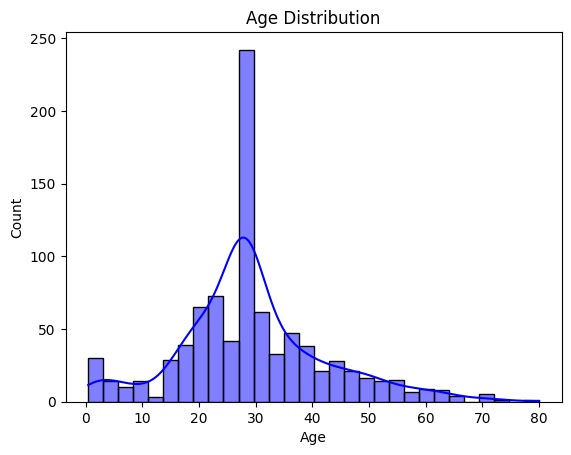

In [7]:
## Age Distribution Note(Unimodal at 28 due to NaValue Median Repair)
sns.histplot(training['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()


### Sex appears to impact survival rate (ie. Favours Women) 

In [8]:
# Sex Stats (Survival Rate, Mean Age and Mean Fare)
sex_stats= training.groupby(training['Sex']).agg(
    {'Survived': 'mean',
    'Age': 'mean',
    'Fare': 'mean'})
sex_stats



,Survived,Age,Fare
Sex,,,
female,0.742038,27.929936,44.479818
male,0.188908,30.140676,25.523893


### Class also appears to impact Survival Rate (ie. Favours Higher classes)

In [9]:
training.groupby(['Pclass'])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Final Preprocessing

In [10]:
label_encoder = LabelEncoder()
training['Sex'] = label_encoder.fit_transform(training['Sex'])
## Female = 0, Male = 1
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,No Cabin Info,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin Info,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,No Cabin Info,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,No Cabin Info,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,No Cabin Info,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0


# Feature Engineering

In [11]:
X_train= training[['Pclass','Sex','Age','SibSp','Parch','Fare','FamSize']]
y_train = training['Survived']


# Creating the Model

In [12]:
model = RandomForestClassifier(random_state= 1)
model.fit(X_train,y_train)



RandomForestClassifier(random_state=1)

# Test Dataset preprocessing

In [13]:
test['Age'].isna().sum()
temp = test['Age'].dropna()
test_age_mean = temp.mean().round(0)

test['Age'] = test['Age'].fillna(test_age_mean)
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Cabin'] = test['Cabin'].fillna('No Cabin Info')

test['Sex'] = label_encoder.transform(test['Sex'])




In [14]:
X_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','FamSize']]
y_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # Assuming 'PassengerId' is present in the test set
    'Survived': y_pred
})

submission.to_csv('titanic_predictions.csv', index=False)

